In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import math


In [3]:
with warnings.catch_warnings():
# ignore all caught warnings
    warnings.filterwarnings("ignore")
# execute code that will generate warning

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)



In [4]:
#Reading file.
df1 = pd.read_excel("Food Orders - Shared-1.xlsx",header=0)
df1.head(5)

,ID,Provider,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Paid amount,...,Delivery charges,Surge charges,Packaging charges,ST,Tip,PureVeg,Items,Membership,Type,Rating
0,1.0,NaN,1-July-2020 8.38 PM,3.0,Delivered,300,PRO,1-July-2020 9.38 PM,50.0,NaN,...,20,NaN,10,5,NaN,Y,PANEER;ROTI,BING,VEG,2.0
1,2.0,NaN,1-July-2020 8.38 AM,3.0,Delivered,100,BF,1-July-2020 8.58 AM,NaN,NaN,...,20,NaN,10,5,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,4.0
2,3.0,NaN,1-July-2020 9.00 PM,6.0,Cancelled,250,PRO,1-July-2020 9.30 PM,25.0,NaN,...,25,10,10,5,5.0,Y,MIXVEG;RICE,BING,VEG,0.0
3,4.0,NaN,1-July-2020 7.30 PM,4.0,Delivered,550,PRO,1-July-2020 9.05 PM,NaN,NaN,...,25,10,10,5,NaN,N,CHICKEN;BIRYANI,NO,MIX,1.0
4,423.0,NaN,1-July-2020 8.38 PM,3.0,Cancelled,125,PRO,1-July-2020 7.38 PM,NaN,NaN,...,20,NaN,10,5,NaN,Y,DAL;ROTI,NO,VEG,1.0


In [5]:
df1.shape

(60, 21)

By using shape, we understand that, have 20 dependent variable and one independent variable,


In [6]:
df1.rename(columns={'DateTime':'OrderDateTime','Status': 'OrderStatus'},inplace=True)

In [7]:
df=df1.copy() # to refer original df when needed
df1.shape == df.shape


True

In [8]:
df.columns

Index(['ID', 'Provider', 'OrderDateTime', 'Distance', 'OrderStatus', 'Cost',
       'PromoCode', 'Delivery Time', 'Discount', 'Paid amount', 'Payment mode',
       'Delivery charges', 'Surge charges', 'Packaging charges', 'ST', 'Tip',
       'PureVeg', 'Items', 'Membership', 'Type', 'Rating'],
      dtype='object')

# 3. Data preparation and EDA
1. From Data set, we have observed that data set having Categorical  columns.
2. Lets see if we need to do data preprocessing  to be done to standardize the data values present in it. Lets try them out one by one.

In [9]:
df.drop(['ID','Provider', 'Paid amount'],axis=1,inplace=True)

I am droping these columns, because We do not see any significance of these columns to derive model

#lets check duplicates before proceeding futrher

In [10]:
df.duplicated().sum()

3

In [11]:
df[df.duplicated(keep=False)]

,OrderDateTime,Distance,OrderStatus,Cost,PromoCode,Delivery Time,Discount,Payment mode,Delivery charges,Surge charges,Packaging charges,ST,Tip,PureVeg,Items,Membership,Type,Rating
5,1-July-2020 8.38 PM,3.0,Cancelled,125,PRO,1-July-2020 8.38 PM,NaN,COD,20,NaN,10,5,NaN,Y,DAL;ROTI,NO,VEG,1.0
11,2-July-2020 8.38 PM,3.0,Delivered,500,NaN,2-July-2020 9.38 PM,50.0,WALLET,20,NaN,10,5,NaN,Y,PANEER;ROTI,BING,VEG,4.0
15,1-July-2020 8.38 PM,3.0,Cancelled,125,PRO,1-July-2020 8.38 PM,NaN,COD,20,NaN,10,5,NaN,Y,DAL;ROTI,NO,VEG,1.0
18,2-July-2020 9.38 AM,3.0,Delivered,300,NaN,2-July-2020 9.58 AM,50.0,WALLET,20,NaN,10,5,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,3.0
19,2-July-2020 9.38 AM,3.0,Delivered,300,NaN,2-July-2020 9.58 AM,50.0,WALLET,20,NaN,10,5,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,3.0
54,2-July-2020 8.38 PM,3.0,Delivered,500,NaN,2-July-2020 9.38 PM,50.0,WALLET,20,NaN,10,5,NaN,Y,PANEER;ROTI,BING,VEG,4.0


In [12]:
df.drop_duplicates(keep='first', inplace=True)
# reset index, because we droped  rows
df.reset_index(drop = True, inplace = True)

In [13]:
#information about data set , from info we can observe som attributes have missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OrderDateTime      57 non-null     object 
 1   Distance           56 non-null     float64
 2   OrderStatus        56 non-null     object 
 3   Cost               57 non-null     object 
 4   PromoCode          35 non-null     object 
 5   Delivery Time      56 non-null     object 
 6   Discount           22 non-null     float64
 7   Payment mode       56 non-null     object 
 8   Delivery charges   57 non-null     object 
 9   Surge charges      28 non-null     object 
 10  Packaging charges  57 non-null     object 
 11  ST                 57 non-null     object 
 12  Tip                23 non-null     float64
 13  PureVeg            56 non-null     object 
 14  Items              56 non-null     object 
 15  Membership         56 non-null     object 
 16  Type               56 non-nu

1. We observed that some  missing values majority of attributes
2. We have observed that dtypes: float64, object. From data set we can see Charges are in numercis. We need to convert data type to numeric.
3. if we check missing values with out converting data to numeric, the object column (which have numeric data) will be missed having the 'missing' values. Because funtion will assume as a string and not return as missing value.

In [14]:
df.isnull().sum()

OrderDateTime         0
Distance              1
OrderStatus           1
Cost                  0
PromoCode            22
Delivery Time         1
Discount             35
Payment mode          1
Delivery charges      0
Surge charges        29
Packaging charges     0
ST                    0
Tip                  34
PureVeg               1
Items                 1
Membership            1
Type                  1
Rating                3
dtype: int64

In [15]:
# convert charges to numeric
df['Cost']=pd.to_numeric(df['Cost'],errors='coerce')
df['Delivery charges']=pd.to_numeric(df['Delivery charges'],errors='coerce')
df['Surge charges']=pd.to_numeric(df['Surge charges'],errors='coerce')
df['Packaging charges']=pd.to_numeric(df['Packaging charges'],errors='coerce')
df['ST']=pd.to_numeric(df['ST'],errors='coerce')


In [16]:
# 1-July-2020 8.38 PM
df['OrderDateTime'] = pd.to_datetime(df['OrderDateTime'],errors='raise',format='%d-%B-%Y %I.%M %p',dayfirst=True )
df['Delivery Time'] = pd.to_datetime(df['Delivery Time'],errors='raise',format='%d-%B-%Y %I.%M %p',dayfirst=True  )

In [17]:
df.dtypes

OrderDateTime        datetime64[ns]
Distance                    float64
OrderStatus                  object
Cost                        float64
PromoCode                    object
Delivery Time        datetime64[ns]
Discount                    float64
Payment mode                 object
Delivery charges            float64
Surge charges               float64
Packaging charges           float64
ST                          float64
Tip                         float64
PureVeg                      object
Items                        object
Membership                   object
Type                         object
Rating                      float64
dtype: object

In [18]:
#Lets look one more time missing values after converting the data
df.isnull().mean()

OrderDateTime        0.000000
Distance             0.017544
OrderStatus          0.017544
Cost                 0.017544
PromoCode            0.385965
Delivery Time        0.017544
Discount             0.614035
Payment mode         0.017544
Delivery charges     0.017544
Surge charges        0.526316
Packaging charges    0.017544
ST                   0.017544
Tip                  0.596491
PureVeg              0.017544
Items                0.017544
Membership           0.017544
Type                 0.017544
Rating               0.052632
dtype: float64

now see there are missing values in cost and other charges afer converting in required format

# MCAR(Missing Completly at Random)

Now look at the Missed Values
1. when I look missing values, I tried to look relation among the distance, status and cost and rating 

In [19]:
df[df.Distance.isnull()]

,OrderDateTime,Distance,OrderStatus,Cost,PromoCode,Delivery Time,Discount,Payment mode,Delivery charges,Surge charges,Packaging charges,ST,Tip,PureVeg,Items,Membership,Type,Rating
21,2020-07-03 20:38:00,NaN,NaN,NaN,20,NaT,10.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN


In [20]:
df.drop(df[df.Distance.isnull()].index,inplace=True)
# reset index, because we droped  rows
df.reset_index(drop = True, inplace = True)

There is no relation between these attributes to get info missing .Hence I can say its MCAR(Missing Completly at Random).
    1.This is not giving any information from any of the attribute. hence I thought to drop this row.seems lot of attributes missing from this row 23. 

In [21]:
df[df['Rating'].isnull()]

,OrderDateTime,Distance,OrderStatus,Cost,PromoCode,Delivery Time,Discount,Payment mode,Delivery charges,Surge charges,Packaging charges,ST,Tip,PureVeg,Items,Membership,Type,Rating
43,2020-07-05 20:38:00,3.0,Delivered,400.0,PRO,2020-07-05 21:38:00,NaN,COD,20.0,20.0,10.0,5.0,NaN,Y,PANEER;ROTI,BING,VEG,NaN
51,2020-07-05 09:38:00,3.0,Delivered,220.0,BF,2020-07-05 09:58:00,NaN,WALLET,20.0,NaN,10.0,5.0,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,NaN


We can see two missing values for rating attribute. These values does not have any dependecy to get miss. Might be customer is not willing to do rating.
Hence we can say it is MCAR.

In [22]:
# Let check if cancelled orders are any missing rating so that we can ignore them
df['Rating'].isnull().groupby(df['OrderStatus']).mean()

OrderStatus
Cancelled    0.000000
Delivered    0.058824
Name: Rating, dtype: float64

In [23]:
print(df["Rating"].std())
print(df["Rating"].mean())

1.7953468857720987
2.388888888888889


<AxesSubplot:ylabel='Density'>

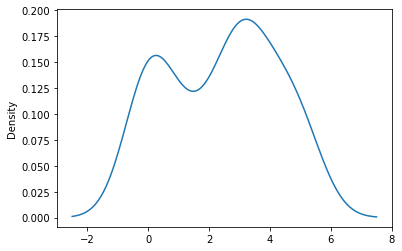

In [24]:
df['Rating'].plot(kind='kde')

In [25]:

tp1 = df['Rating'].fillna(df['Rating'].mean()) 
tp2 = df['Rating'].fillna(df['Rating'].median()) 

In [26]:
print(tp1.std())
print(tp2.std())

1.7624019422539816
1.7661132025314359


Either of the case, replaced ratings has least effect on variance, lets replace with mean

In [27]:
df['Rating'].fillna(round(df['Rating'].mean(),1),inplace=True) 

<AxesSubplot:ylabel='Density'>

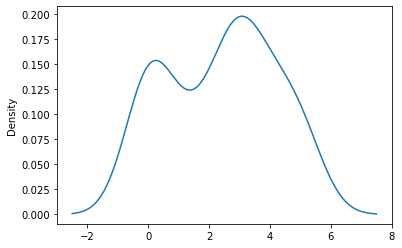

In [28]:
df['Rating'].plot(kind='kde')

There is no relation between these attributes to get info missing 
    2.  I am updating 'Rating' missing values with mean . I can see minimal varaince in rating which can ignorable

In [29]:
df.isnull().sum()

OrderDateTime         0
Distance              0
OrderStatus           0
Cost                  0
PromoCode            22
Delivery Time         0
Discount             35
Payment mode          0
Delivery charges      0
Surge charges        29
Packaging charges     0
ST                    0
Tip                  34
PureVeg               0
Items                 0
Membership            0
Type                  0
Rating                0
dtype: int64

# "Missing data Not At Random (MNAR)": 
Promo Code, Surge charges,tip are "Missing data Not At Random (MNAR)": Systematic missing values Because these values not related to any variable, these are depends on circumstances. 
1. if we replace with mean or median ,  the numbers will effect on variablity. 
2. Hence we will replace with zero.

In [30]:
#MNAR : MISSING DATA NOT AT RANDOM
#LETS FILL THESE SYSTEMATIC MISSING VALUES WITH ZERO
df['PromoCode']=df['PromoCode'].fillna('NoP') #if I fill it may effect feature selection process after creating in dummy variable
df['Discount']=df['Discount'] .fillna(0)
df['Surge charges']=df['Surge charges'].fillna(0)
df['Tip']=df['Tip'].fillna(0)

In [31]:
df.isnull().sum().mean()  # We can say no missing values now

0.0

Oh...Luckily, we do not have missing values in categorical values, No more missing values :)

In [32]:
df.head(2) 

,OrderDateTime,Distance,OrderStatus,Cost,PromoCode,Delivery Time,Discount,Payment mode,Delivery charges,Surge charges,Packaging charges,ST,Tip,PureVeg,Items,Membership,Type,Rating
0,2020-07-01 20:38:00,3.0,Delivered,300.0,PRO,2020-07-01 21:38:00,50.0,COD,20.0,0.0,10.0,5.0,0.0,Y,PANEER;ROTI,BING,VEG,2.0
1,2020-07-01 08:38:00,3.0,Delivered,100.0,BF,2020-07-01 08:58:00,0.0,WALLET,20.0,0.0,10.0,5.0,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,4.0


In [33]:
#Lets convert object values to categorical type
df = df.astype({"OrderStatus":'category', "PromoCode":'category',  
                              "Payment mode":'category', "PureVeg":'category', 
                              "Membership":'category', "Type":'category'}) 

In [135]:
df[['Distance']].min()

Distance    0.0
dtype: float64

In [34]:
# Describe the statitics of data
df.describe()


,Distance,Cost,Discount,Delivery charges,Surge charges,Packaging charges,ST,Tip,Rating
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.0,56.0,56.000000,56.000000
mean,3.625000,291.250000,12.500000,21.785714,6.785714,10.0,5.0,1.964286,2.389286
std,1.369306,140.046259,19.656135,2.417469,7.887192,0.0,0.0,2.464027,1.762403
min,-2.000000,100.000000,-25.000000,20.000000,0.000000,10.0,5.0,0.000000,0.000000
25%,3.000000,200.000000,0.000000,20.000000,0.000000,10.0,5.0,0.000000,0.750000
50%,3.000000,280.000000,0.000000,20.000000,0.000000,10.0,5.0,0.000000,3.000000
75%,4.000000,400.000000,25.000000,25.000000,10.000000,10.0,5.0,5.000000,4.000000
max,6.000000,600.000000,50.000000,25.000000,20.000000,10.0,5.0,5.000000,5.000000


We can observe following things from the data
1. Distance min is negative , normally which is not the case,we will analysis futher on this, this can be a outlier;
2. packaging charges and ST are equal all the time (Min=Max)
3. discount 

### Dealing with invalid values i.e negative values

In [126]:
num = df._get_numeric_data()

In [36]:
num[num<0] = 0

In [37]:
df.describe()

,Distance,Cost,Discount,Delivery charges,Surge charges,Packaging charges,ST,Tip,Rating
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.0,56.0,56.000000,56.000000
mean,3.660714,291.250000,12.946429,21.785714,6.785714,10.0,5.0,1.964286,2.389286
std,1.239894,140.046259,19.063930,2.417469,7.887192,0.0,0.0,2.464027,1.762403
min,0.000000,100.000000,0.000000,20.000000,0.000000,10.0,5.0,0.000000,0.000000
25%,3.000000,200.000000,0.000000,20.000000,0.000000,10.0,5.0,0.000000,0.750000
50%,3.000000,280.000000,0.000000,20.000000,0.000000,10.0,5.0,0.000000,3.000000
75%,4.000000,400.000000,25.000000,25.000000,10.000000,10.0,5.0,5.000000,4.000000
max,6.000000,600.000000,50.000000,25.000000,20.000000,10.0,5.0,5.000000,5.000000


# Deriving Attributes

    1. we can observe that , we can derive duration of the delivery from existing order time and deliver time.
    2. We derivred two attribiutes from time i.e Delivered Duration and second one Cancelled Duration.
    3. "Paid amount" can be derived from cost-discount+delivery charges + surg charges + tip 

In [40]:
Duration= abs((df['Delivery Time'] -df['OrderDateTime'])/np.timedelta64(1,'m'))

Time can not be negative so I took abs value

In [41]:
paidamount = []
Deliveryduration = []
Cancelledduration = []
Dummy = 0 
for i in range(df.shape[0]):
    if df.OrderStatus[i] == 'Delivered':
        Paidamount = df.Cost[i] - df.Discount[i] +  df['Delivery charges'][i] + df['Surge charges'][i] +df['Packaging charges'][i]+ df.ST[i] + df.Tip[i]
        paidamount.append(Paidamount)
        duration = Duration[i] 
        Deliveryduration.append(duration)
        Cancelledduration.append(Dummy)
#    elif df.OrderStatus[i] == 'Cancelled':
    else:
        Deliveryduration.append(Dummy)
        paidamount.append(Dummy)
        duration = Duration[i]
        Cancelledduration.append(duration)

In [42]:
df['paidamount']=paidamount
df['Deliveryduration'] = Deliveryduration
df['Cancelledduration'] = Cancelledduration

In [43]:
df.head(5)

,OrderDateTime,Distance,OrderStatus,Cost,PromoCode,Delivery Time,Discount,Payment mode,Delivery charges,Surge charges,...,ST,Tip,PureVeg,Items,Membership,Type,Rating,paidamount,Deliveryduration,Cancelledduration
0,2020-07-01 20:38:00,3.0,Delivered,300.0,PRO,2020-07-01 21:38:00,50.0,COD,20.0,0.0,...,5.0,0.0,Y,PANEER;ROTI,BING,VEG,2.0,285.0,60.0,0.0
1,2020-07-01 08:38:00,3.0,Delivered,100.0,BF,2020-07-01 08:58:00,0.0,WALLET,20.0,0.0,...,5.0,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,4.0,140.0,20.0,0.0
2,2020-07-01 21:00:00,6.0,Cancelled,250.0,PRO,2020-07-01 21:30:00,25.0,CARD,25.0,10.0,...,5.0,5.0,Y,MIXVEG;RICE,BING,VEG,0.0,0.0,0.0,30.0
3,2020-07-01 19:30:00,4.0,Delivered,550.0,PRO,2020-07-01 21:05:00,0.0,COD,25.0,10.0,...,5.0,0.0,N,CHICKEN;BIRYANI,NO,MIX,1.0,600.0,95.0,0.0
4,2020-07-01 20:38:00,3.0,Cancelled,125.0,PRO,2020-07-01 19:38:00,0.0,COD,20.0,0.0,...,5.0,0.0,Y,DAL;ROTI,NO,VEG,1.0,0.0,0.0,60.0


In [44]:
#checking Duplicate after impution if any
df.duplicated().sum()

0

In [45]:
df.to_excel("Food_New3.xlsx",index=True)

# EDA
In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task

#Explore Categorical (Nominal) Independent Variable

In [46]:
# Set the color coding for the visualizations to be plotted
from matplotlib import cm
cmap = cm.get_cmap('jet')
cmap1 = cm.get_cmap('Spectral')


In [47]:
#Lets check unique values for categorical columns
print(df['OrderStatus'].unique())
print(df['Type'].unique())
print(df['PureVeg'].unique())
print(df['Payment mode'].unique())
print(df['PromoCode'].unique())
print(df['Membership'].unique())

['Delivered', 'Cancelled']
Categories (2, object): ['Delivered', 'Cancelled']
['VEG', 'MIX']
Categories (2, object): ['VEG', 'MIX']
['Y', 'N']
Categories (2, object): ['Y', 'N']
['COD', 'WALLET', 'CARD']
Categories (3, object): ['COD', 'WALLET', 'CARD']
['PRO', 'BF', 'NoP']
Categories (3, object): ['PRO', 'BF', 'NoP']
['BING', 'BONG', 'NO']
Categories (3, object): ['BING', 'BONG', 'NO']


max 3 types of cat values are there

In [48]:
print(df['Distance'].unique())

[3. 6. 4. 0.]


In [49]:
#Lets Try Exploring Individual Attributes - 
## Univariate Analysis

print(df['OrderStatus'].value_counts())
print(df['Type'].value_counts())
print(df['PureVeg'].value_counts())
print(df['Payment mode'].value_counts())
print(df['Items'].value_counts())

Delivered    34
Cancelled    22
Name: OrderStatus, dtype: int64
VEG    34
MIX    22
Name: Type, dtype: int64
Y    34
N    22
Name: PureVeg, dtype: int64
COD       25
WALLET    21
CARD      10
Name: Payment mode, dtype: int64
PANEER;ROTI         12
DAL;CHICKEN;ROTI    12
DAL;ROTI            12
CHICKEN;BIRYANI     10
MIXVEG;RICE         10
Name: Items, dtype: int64


Order Status, Type, PureVeg is giving similar  number counts , lets furthee anaylsis on this

In [50]:

print(df['PromoCode'].value_counts())
print(df['Membership'].value_counts())


PRO    27
NoP    22
BF      7
Name: PromoCode, dtype: int64
BING    27
NO      17
BONG    12
Name: Membership, dtype: int64


In [51]:
for Cat in df.select_dtypes(exclude=['int','float','datetime64[ns]']):
    print(Cat)

OrderStatus
PromoCode
Payment mode
PureVeg
Items
Membership
Type


<ipython-input-52-e5873859aa2d>:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  sns.countplot(x = 'Items',data = df, ax = axs[2], palette="Set1").set_xticklabels(Items,Rotation=90)


[Text(0, 0, 'PANEER;ROTI'),
 Text(1, 0, 'DAL;CHICKEN;ROTI'),
 Text(2, 0, 'MIXVEG;RICE'),
 Text(3, 0, 'CHICKEN;BIRYANI'),
 Text(4, 0, 'DAL;ROTI')]

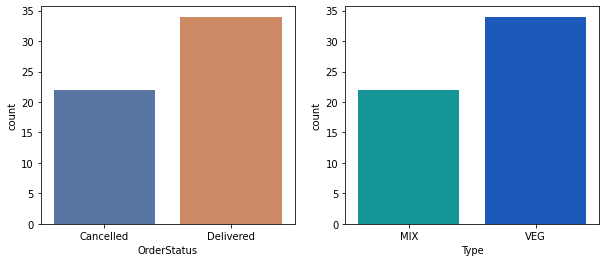

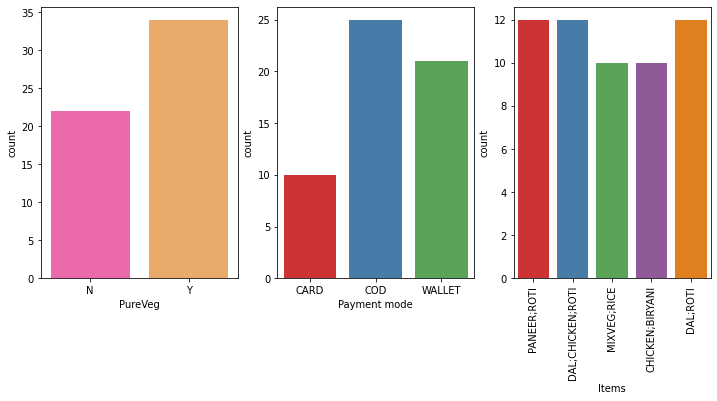

In [52]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))

sns.countplot(x = 'OrderStatus', data = df, ax = axs[0],palette="deep");
sns.countplot(x = 'Type', data = df, ax = axs[1], palette="winter_r");
fig, axs = plt.subplots(1, 3, figsize=(12,5))
sns.countplot(x = 'PureVeg', data = df, ax = axs[0], palette="spring");
sns.countplot(x = 'Payment mode', data = df, ax = axs[1], palette="Set1");

Items=df['Items'].unique()

sns.countplot(x = 'Items',data = df, ax = axs[2], palette="Set1").set_xticklabels(Items,Rotation=90)

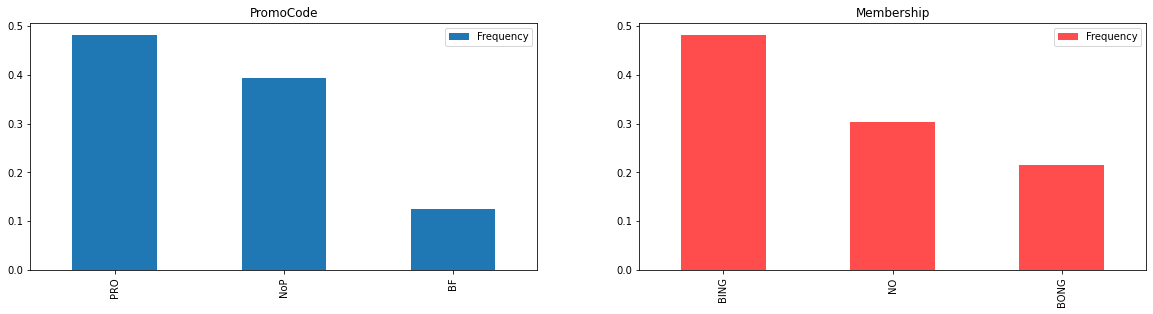

In [53]:
plt.figure(2) 

plt.subplot(221) 
df['PromoCode'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'PromoCode',label='Frequency') 
plt.legend()
plt.subplot(222) 
df['Membership'].value_counts(normalize=True).plot.bar(title= 'Membership', color='red',alpha=0.7,label='Frequency') 
plt.legend()



a few insights from above exploration
1. Type/Veg is giving same information 
2. Most of the customers are perfering payment through COD and wallet.
3. Cancelled Orders are half of the delivered orders, This shows that cancellation count is more.
4. Most of the customers looking for membership
5. Customers who are looking for promcode little more, how ever I can see people are  giving Less importance to Promo Code
6. All Items are distributed in equal range of orders

#Explore Numerical Independent Variable

In [54]:
for Cat in df.select_dtypes(include=['int','float','datetime64[ns]']):
    print(Cat)

OrderDateTime
Distance
Cost
Delivery Time
Discount
Delivery charges
Surge charges
Packaging charges
ST
Tip
Rating
paidamount
Deliveryduration
Cancelledduration


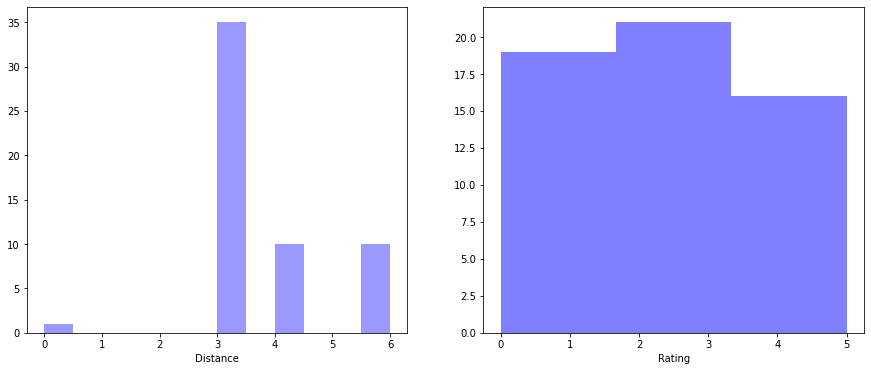

In [55]:
fig, axs = plt.subplots(1, 2, figsize=(15,6))
#plt.subplot(121) 
sns.distplot(df['Distance'], hist=True, ax = axs[0], kde=False,color='Blue');  
sns.distplot(df['Rating'],hist=True, ax = axs[1], kde=False,hist_kws = {'color':'blue','alpha':0.5});



Most of the orderas are coming with in 4 km distance.

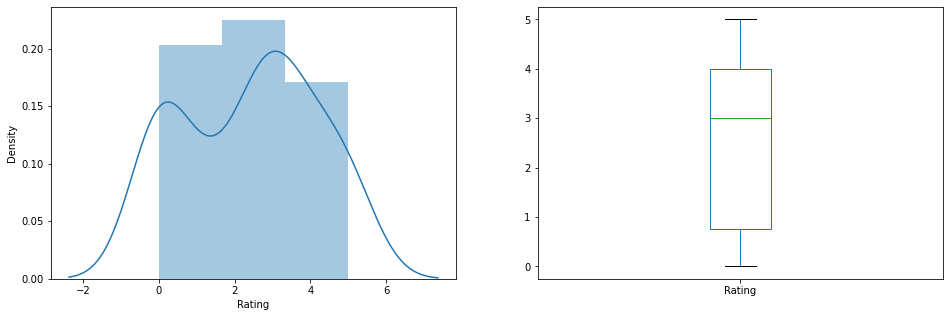

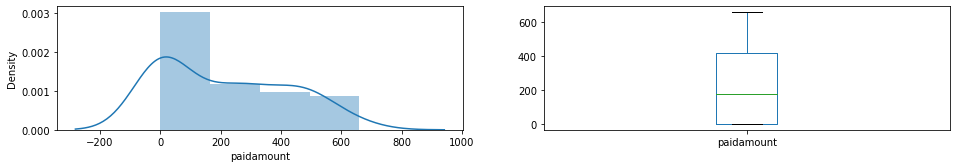

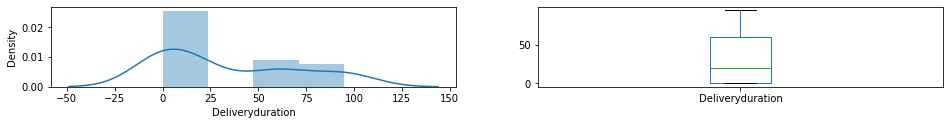

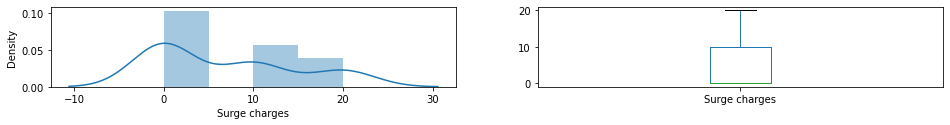

In [56]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(df['Rating'], hist=True, kde=True);  

plt.subplot(122) 
df['Rating'].plot.box(figsize=(16,5)) 
plt.show()

plt.figure(2) 
plt.subplot(221) 
sns.distplot(df['paidamount'], hist=True, kde=True);  

plt.subplot(222) 
df['paidamount'].plot.box(figsize=(16,5)) 
plt.show()

plt.figure(3) 
plt.subplot(321) 
sns.distplot(df['Deliveryduration'],  kde=True);  

plt.subplot(322) 
df['Deliveryduration'].plot.box(figsize=(16,5)) 
plt.show()

plt.figure(3) 
plt.subplot(321) 
sns.distplot(df['Surge charges'],  kde=True);  

plt.subplot(322) 
df['Surge charges'].plot.box(figsize=(16,5)) 
plt.show()




I can see most of the data is normaly distributed.
Most of the ordered items are 100 to 300 by looking at cost varaiable
And - We do not see any outliers in these variables 


# Bivariate Analyis - explore relationship between two attributes

In [57]:
df.columns 

Index(['OrderDateTime', 'Distance', 'OrderStatus', 'Cost', 'PromoCode',
       'Delivery Time', 'Discount', 'Payment mode', 'Delivery charges',
       'Surge charges', 'Packaging charges', 'ST', 'Tip', 'PureVeg', 'Items',
       'Membership', 'Type', 'Rating', 'paidamount', 'Deliveryduration',
       'Cancelledduration'],
      dtype='object')

In [58]:
OrderStatus=pd.crosstab(df['OrderStatus'],df['Rating'])
OrderStatus

Rating,0.0,1.0,2.0,2.4,3.0,4.0,5.0
OrderStatus,,,,,,,
Cancelled,14,3,1,0,4,0,0
Delivered,0,2,4,2,10,8,8


<AxesSubplot:xlabel='Rating', ylabel='count'>

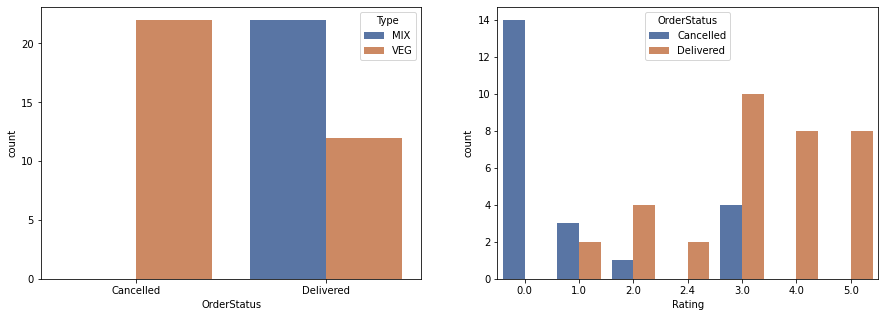

In [59]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
sns.countplot(x = 'OrderStatus', data = df,hue='Type', ax = axs[0],palette="deep");
sns.countplot('Rating',data=df,hue='OrderStatus',ax=axs[1],palette="deep")

    We can observe that most of the delivered orders are rated between 3-5.
    
    Cancellation count is also huge in orders and observed that Cacellation rate high in veg Orders.

    we will see further analysis on cnacellation 

In [60]:
df['Deliveryduration'].unique()

array([60., 20.,  0., 95.])

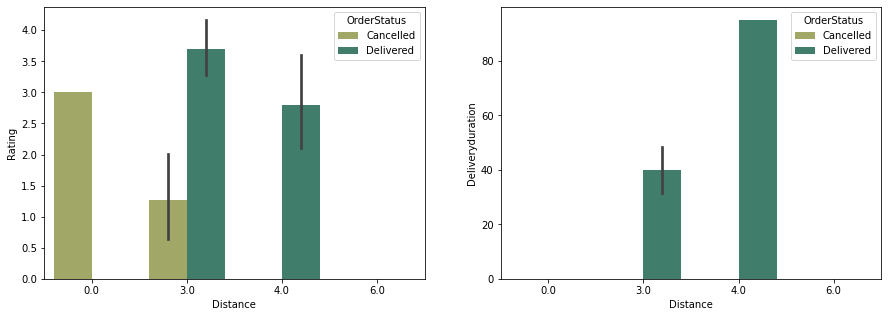

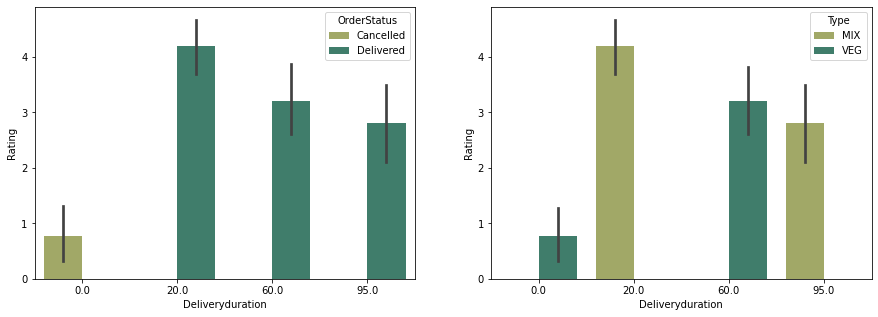

In [61]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
sns.barplot(x='Distance',y='Rating',data=df,hue='OrderStatus',ax=axs[0],palette='gist_earth_r');
sns.barplot(x='Distance',y='Deliveryduration',data=df,hue='OrderStatus',ax=axs[1],palette='gist_earth_r') 
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(15,5))
sns.barplot(x='Deliveryduration',y='Rating',data=df,hue='OrderStatus',ax=axs[0],palette='gist_earth_r')
sns.barplot(x='Deliveryduration',y='Rating',data=df,hue='Type',ax=axs[1],palette='gist_earth_r')
plt.show()

        Distance and Delivery Duration are co related?   
        - From Graph we can these are less co related because most of the orders are placed in same distance range but distance is effecing on the rating becuase some orders are getting delivered early in same range and others are not getting
    lets see what is the cause for delay?
    - Most of the veg delivered after 60 min  and Mix orders are getting deliverd fast.
    - veg orders are getting late.
    Rating
    - most of the orders delivered in 20 to 60 min are receiving good rating 
    - We can observe that distance increase , rating decreases  

<AxesSubplot:xlabel='Membership', ylabel='Rating'>

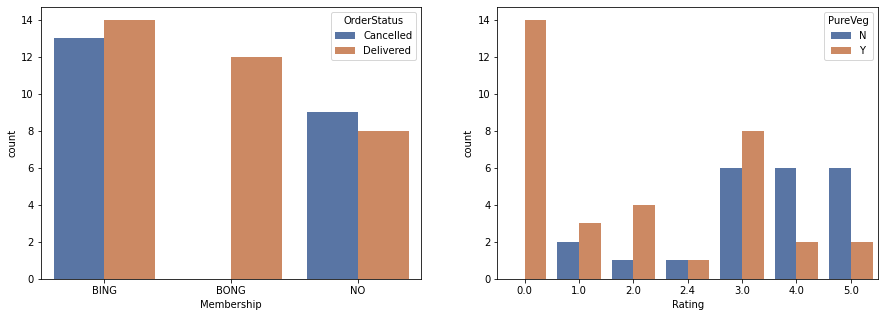

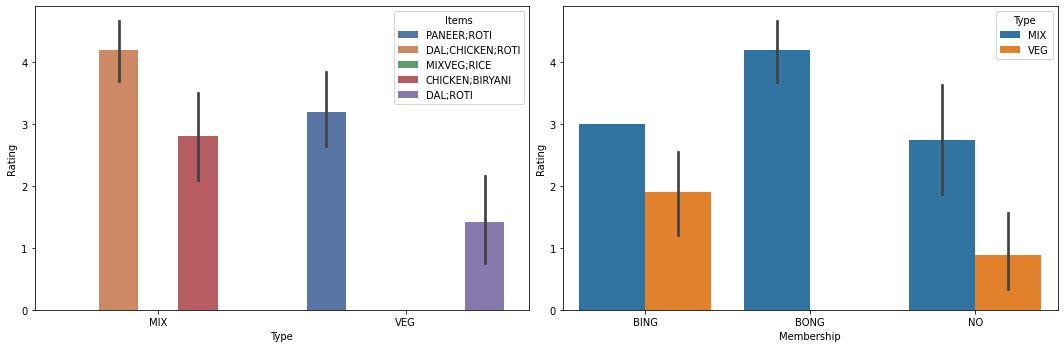

In [62]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
sns.countplot(x = 'Membership', data = df,hue='OrderStatus', ax = axs[0],palette="deep");
sns.countplot(x = 'Rating', data = df,hue='PureVeg', ax = axs[1],palette="deep");


fig, axs = plt.subplots(1, 2, figsize=(15,5))
Items = df["Items"].unique()
sns.barplot(x = 'Type', y = 'Rating',data = df,hue='Items', ax = axs[0],palette="deep")
plt.tight_layout()
sns.barplot(x='Membership',y='Rating',hue='Type',data=df,ax=axs[1])

    From this graph we can understand that following things
    1. Type, PureVeg, Items attributes are giving same kind of information , Hence we will check co relation with rating before removing any of them
    2.  Mix type orders have good rating when we compare with Veg.
    3. Membership-"Bong" membership orders are mostly rated and we can see that all 'BONG' membership are mixed type orders
    4. Cancelled Orders are coming from Membership Orders and i.e veg orders (From above analysis)

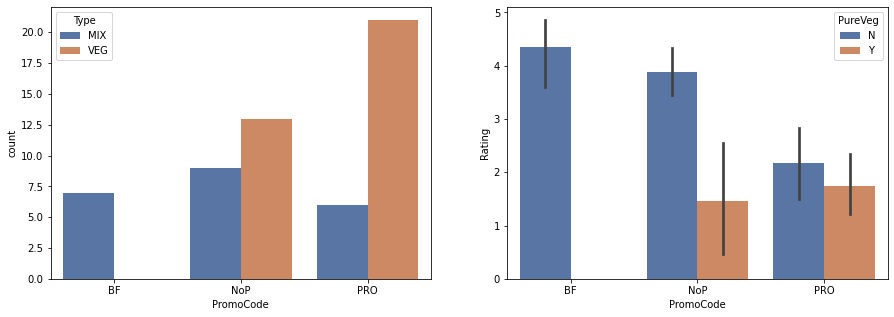

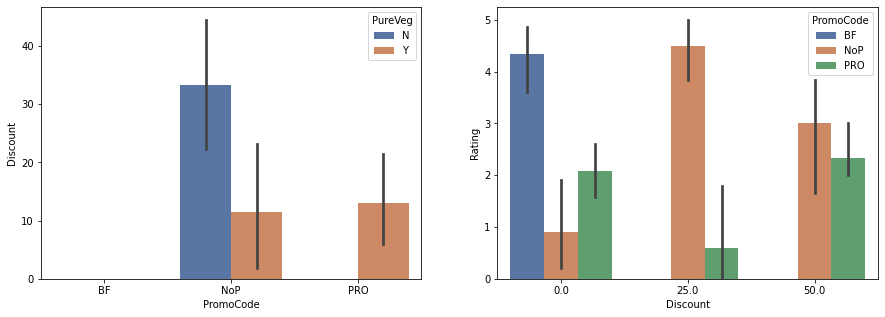

In [63]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
sns.countplot(x = 'PromoCode', data = df,hue='Type', ax = axs[0],palette="deep");
sns.barplot(x = 'PromoCode',y='Rating', data = df,hue='PureVeg', ax = axs[1],palette="deep");

fig, axs = plt.subplots(1, 2, figsize=(15,5))
sns.barplot(x = 'PromoCode',y='Discount', data = df,hue='PureVeg', ax = axs[0],palette="deep");
sns.barplot(x = 'Discount',y='Rating', data = df,hue='PromoCode', ax = axs[1],palette="deep");


    We can observe following points 
    1. We can see equal no of customers applying promo code and not applying.
    2. Mix orders are largly used promo code.
    3. When customer applied promo code 'BF' , there is no discount recieved to the order, Even those customer are willing to do rating , hence we can say it may effect on rating. 
    5. Most of the Veg orders applied for promo code.
    4. In this case we can say  discount and promo code less  co related.
    
     Nopromo Code customer are also getting Discounted . It can be a company promotion etc.

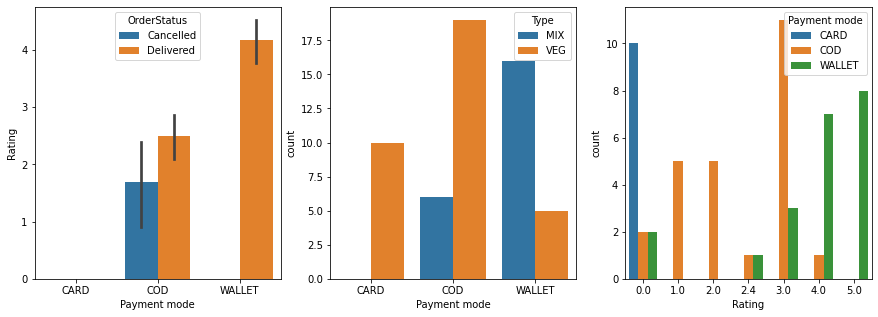

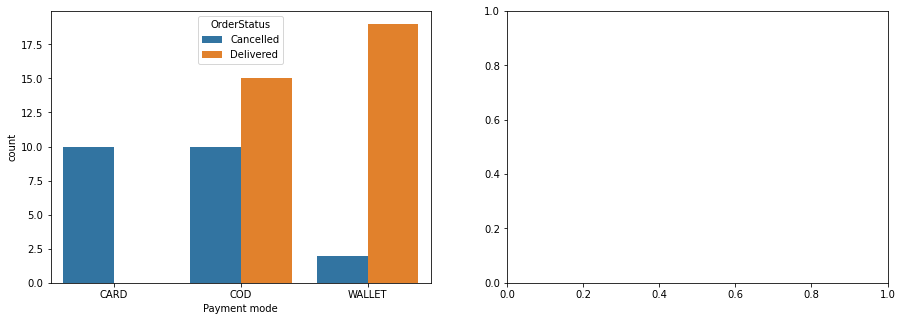

In [64]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
sns.barplot(x='Payment mode',y='Rating',data=df,hue='OrderStatus',ax=axs[0]);
sns.countplot(x='Payment mode',hue='Type',data=df,ax=axs[1])
sns.countplot(x='Rating',hue='Payment mode',data=df,ax=axs[2])

fig, axs = plt.subplots(1 ,2,figsize=(15,5))
sns.countplot(x='Payment mode',data=df,hue='OrderStatus',ax=axs[0]);

    We can observe that Most of the card transactions are cancelled amd have zero rating it can be any reason, we can assume that user may have cancelled or there is fault in the system which  automatically cancelling orders. 
    There are good number of orders delivered through COD and WALLET payment mode. We can assume that customers are willing to pay through COD and Wallet mode.
    Most of Mix type orders used payment method as Wallet
    COD and Wallet orders have good ratings respectively.


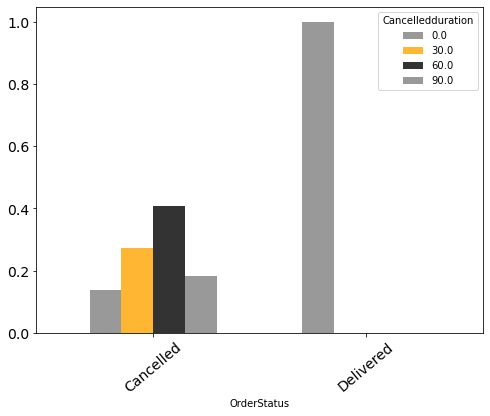

In [66]:
colors_list= ['Grey','Orange','Black']
Cancelled=pd.crosstab(df['OrderStatus'],df['Cancelledduration'])
Cancelled.div(Cancelled.sum(1).astype(float), axis=0).plot(kind="bar", color=colors_list, stacked=False, figsize=(8,6),width=0.6,alpha=0.8,fontsize=14)
plt.xticks(rotation=40)
plt.show()


    Cancellation inference : 
        1. Veg orders are getting cancelled
        2. Card transaction orders are getting cancelled,it can be any reason, we can assume that user may have cancelled or there is fault in the system which  automatically cancelling orders
       
        3. People are have membership also going for cancellation 
        4. Most of cancelled orders are around 30-60 min . We can assume that people may not want wait longer to receive orders or any system problem

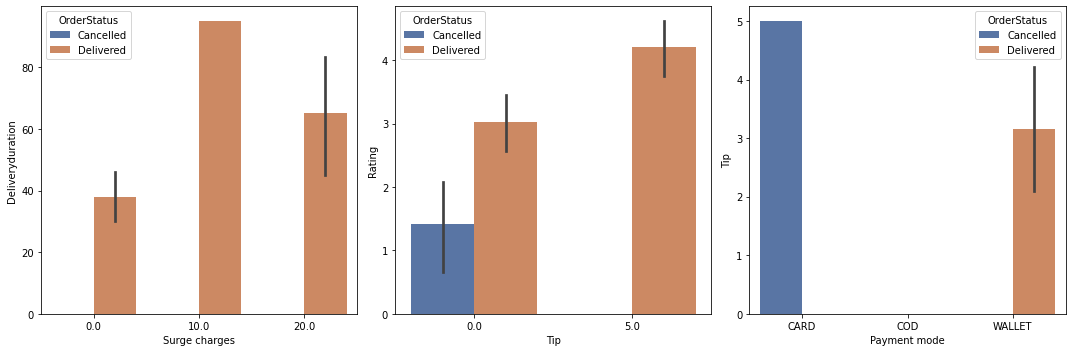

In [67]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
sns.barplot(x = 'Surge charges',y ='Deliveryduration', data = df,hue='OrderStatus', palette="deep",ax=axs[0])
plt.tight_layout()

Tip=pd.crosstab([df['OrderStatus'],df['Tip']],df['Payment mode'])
sns.barplot(x = 'Tip',y ='Rating', data = df,hue='OrderStatus', palette="deep",ax=axs[1])
plt.tight_layout()

sns.barplot(x = 'Payment mode',y ='Tip', data = df,hue='OrderStatus', palette="deep",ax=axs[2])
plt.tight_layout()





    In General surge charges are apply on demanding hours , We can say surge charges are not effecting the delivery duration and from above bar graph, 

    we see that delivery duration and rating are inversly  propotinal (from above analysis)
    
    Intersting thing is Cancelled Orders are have tip and those are from Card transactions.
    
    All Card tarnsactions are Cancelled Orders. So we can say Tip influence Rating.

<AxesSubplot:xlabel='Payment mode', ylabel='Distance'>

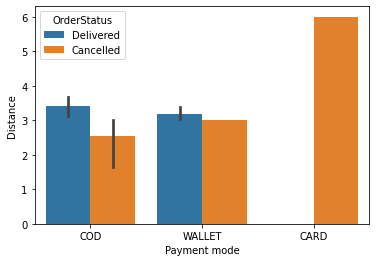

In [69]:
sns.barplot(y=df1.Distance,x=df1['Payment mode'],data=df1,hue='OrderStatus')

In [140]:
df.columns

Index(['Distance', 'OrderStatus', 'Discount', 'Delivery charges',
       'Surge charges', 'Tip', 'PureVeg', 'Rating', 'paidamount',
       'Deliveryduration', 'Cancelledduration', 'BF', 'NoP', 'PRO', 'Card',
       'COD', 'WALLET', 'Items_CHICKEN;BIRYANI', 'Items_DAL;CHICKEN;ROTI',
       'Items_DAL;ROTI', 'Items_MIXVEG;RICE', 'Items_PANEER;ROTI', 'BING',
       'BONG', 'M_NO'],
      dtype='object')

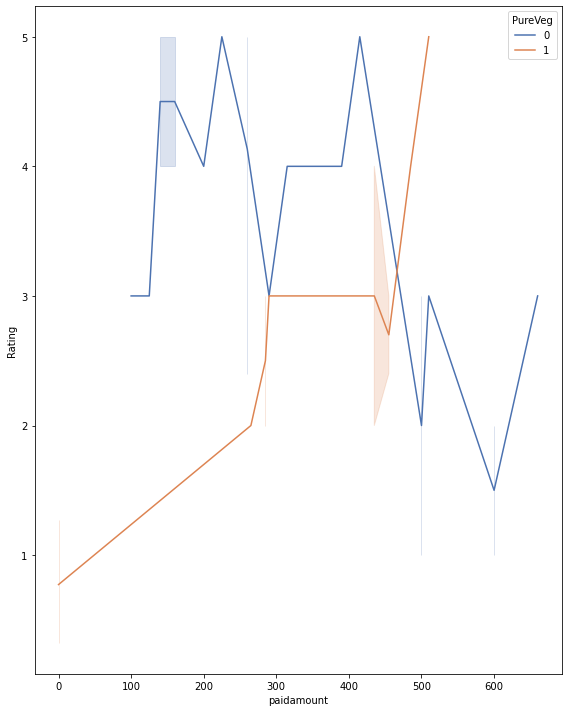

In [143]:
sns.lineplot(x = 'paidamount',y ='Rating', data = df,hue='PureVeg', palette="deep")
plt.tight_layout()

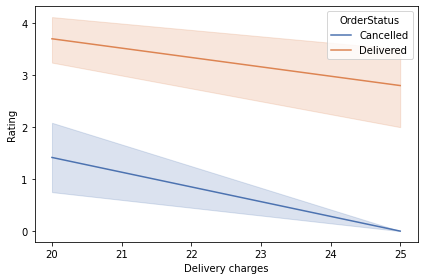

In [71]:
sns.lineplot(x = 'Delivery charges',y ='Rating', data = df,hue='OrderStatus', palette="deep")
plt.tight_layout()

We observe that MIX (Type) orders are getting more rating when paid amount increases and Veg orders rating decreases when paid amount is decreasing.

In [72]:
# by using pairgrid
#g = sns.PairGrid(df)
#g.map(sns.scatterplot)

# Dummy Variable Creation /Replacing Existing variable with Binary values

        Before going further 
        we are creating Dummy variable after EDA because this dummy variable creation could not effect the EDA.
         I just want to drop some rows because we already derived three attributes
        1. Derived Delivered Duration  & cancelled duration from Ordered time and delivered time
        2. Paid amount derived from Cash-Discount wih other variables
        3. From The above EDA , we observed that PureVeg and Type variables are giving same type of  information
        5. Discount and promo attribute are less co related
        6. 'Packaging charges', 'ST' are constants and may effect model building hence droping these.

In [73]:
# droping  attributes which we used for derive and similar type attribute
columns=['OrderDateTime','Cost','Delivery Time','Type','Packaging charges', 'ST']
df.drop(columns,axis=1,inplace=True)

In [144]:
#Replace categorical values to binary values.
df['OrderStatus'].replace(to_replace=['Delivered','Cancelled'],value=[1,0], inplace= True)
df['PureVeg'].replace(to_replace=['Y','N'],value=[1,0], inplace= True)


TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [75]:
columns=['PromoCode','Payment mode','Items','Membership']
Dummy_catg=pd.get_dummies(df[columns])


In [76]:
Dummy_catg.rename(columns = {'PromoCode_BF':'BF', 'PromoCode_NoP':'NoP','PromoCode_PRO':'PRO','Payment mode_CARD':'Card',
                            'Payment mode_COD':'COD','Payment mode_WALLET':'WALLET','Membership_BING':'BING','Membership_BONG':'BONG',
                            'Membership_NO':'M_NO'}, inplace = True)

In [77]:
#Dummy_catg.rename(columns={'fuel-type-gas':'gas', 'fuel-type-diesel':'diesel'}, inplace=True)
Dummy_catg.head()

,BF,NoP,PRO,Card,COD,WALLET,Items_CHICKEN;BIRYANI,Items_DAL;CHICKEN;ROTI,Items_DAL;ROTI,Items_MIXVEG;RICE,Items_PANEER;ROTI,BING,BONG,M_NO
0,0,0,1,0,1,0,0,0,0,0,1,1,0,0
1,1,0,0,0,0,1,0,1,0,0,0,0,1,0
2,0,0,1,1,0,0,0,0,0,1,0,1,0,0
3,0,0,1,0,1,0,1,0,0,0,0,0,0,1
4,0,0,1,0,1,0,0,0,1,0,0,0,0,1


In [78]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, Dummy_catg], axis=1)

# drop original column "fuel-type" from "df"
df.drop(columns, axis = 1, inplace=True)

In [79]:
df.head(2)

,Distance,OrderStatus,Discount,Delivery charges,Surge charges,Tip,PureVeg,Rating,paidamount,Deliveryduration,...,COD,WALLET,Items_CHICKEN;BIRYANI,Items_DAL;CHICKEN;ROTI,Items_DAL;ROTI,Items_MIXVEG;RICE,Items_PANEER;ROTI,BING,BONG,M_NO
0,3.0,1,50.0,20.0,0.0,0.0,1,2.0,285.0,60.0,...,1,0,0,0,0,0,1,1,0,0
1,3.0,1,0.0,20.0,0.0,5.0,0,4.0,140.0,20.0,...,0,1,0,1,0,0,0,0,1,0


In [80]:
df.shape

(56, 25)

In [81]:
df.columns

Index(['Distance', 'OrderStatus', 'Discount', 'Delivery charges',
       'Surge charges', 'Tip', 'PureVeg', 'Rating', 'paidamount',
       'Deliveryduration', 'Cancelledduration', 'BF', 'NoP', 'PRO', 'Card',
       'COD', 'WALLET', 'Items_CHICKEN;BIRYANI', 'Items_DAL;CHICKEN;ROTI',
       'Items_DAL;ROTI', 'Items_MIXVEG;RICE', 'Items_PANEER;ROTI', 'BING',
       'BONG', 'M_NO'],
      dtype='object')

### OUTLIER DETETCTION IF ANY WE CAN REMOVE THE BY USING IQR METHOD

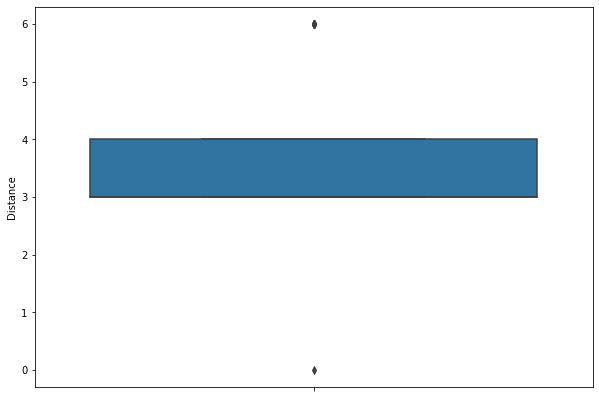

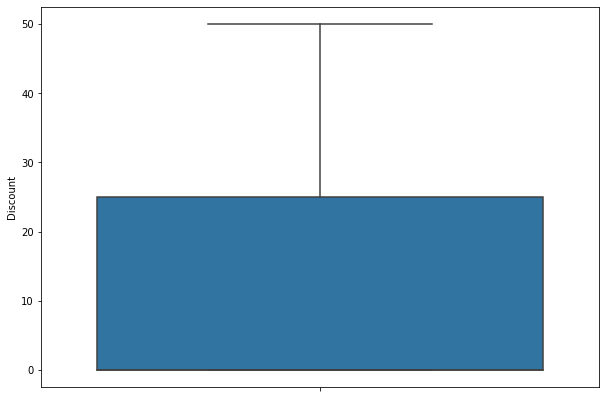

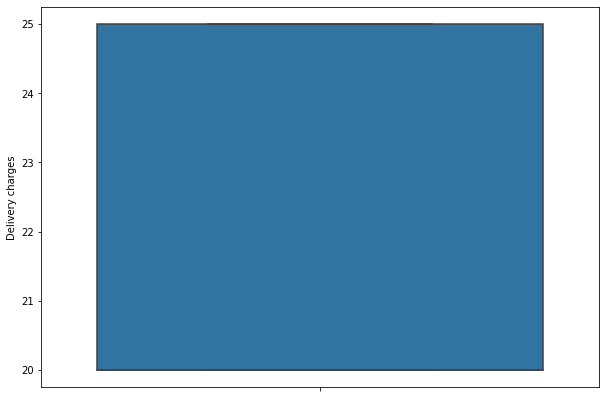

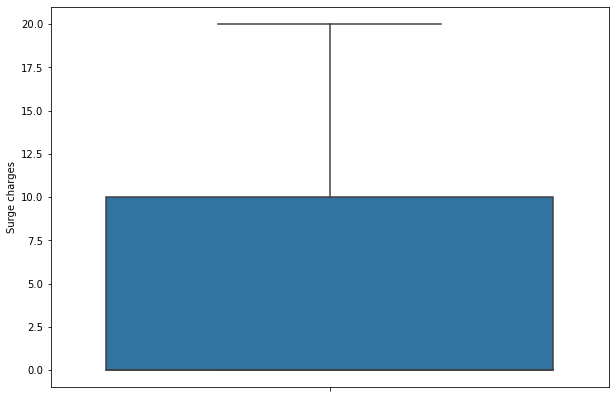

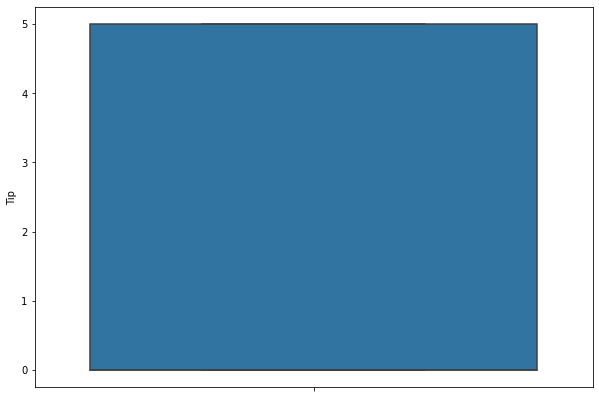

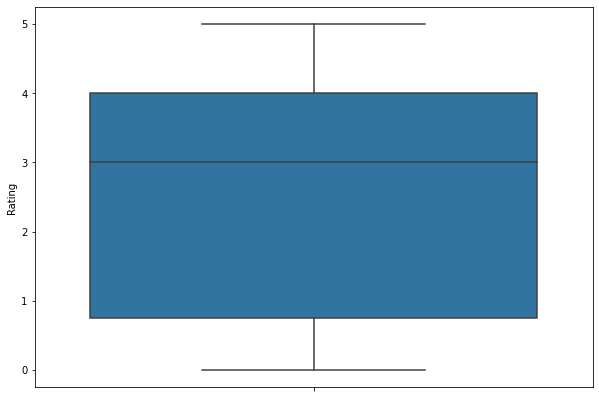

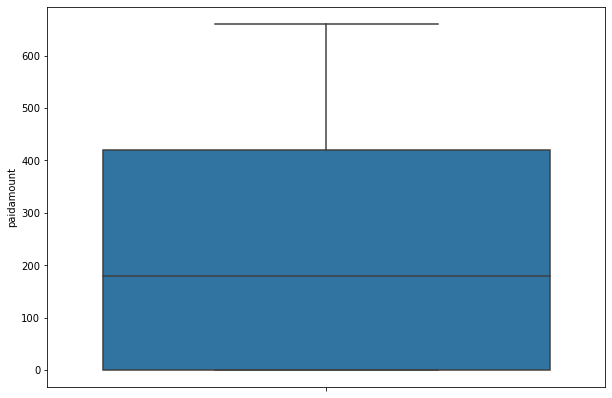

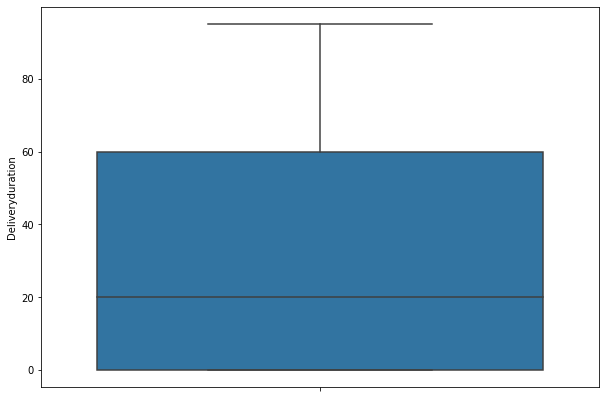

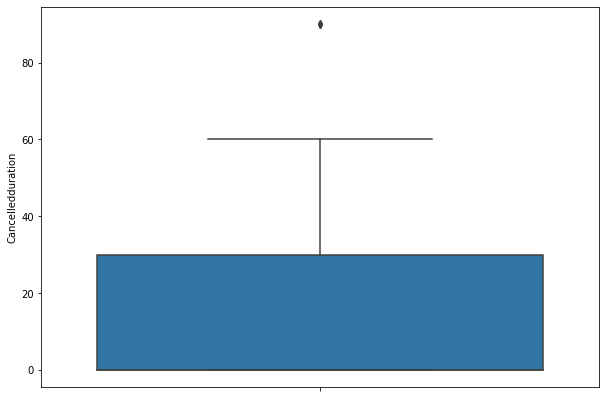

In [82]:
for Cat in df.select_dtypes(include=['int','float']):
    fig = plt.figure(figsize =(10, 7))
 
    # Creating plot
    sns.boxplot(y=df[Cat],data=df)
 
    # show plot
    plt.show()

Oh !!! I can see mostly no outliers present in data , It is good for us

# Feature Selection

# 1. Filter Method

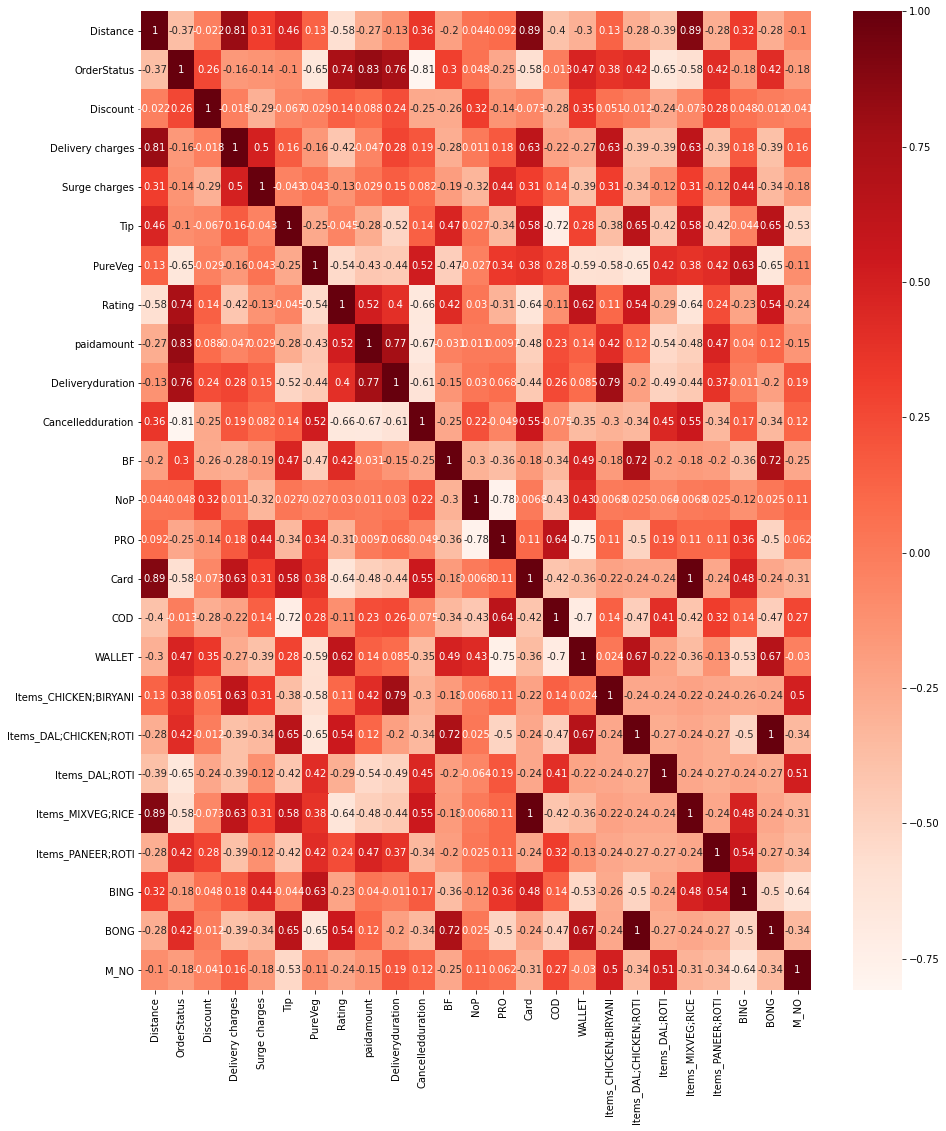

In [83]:
#Using Pearson Correlation
plt.figure(figsize=(15,18))
cor = df.corr('pearson')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [84]:
#Correlation with output variable
cor_target = abs(cor["Rating"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Distance                  0.577470
OrderStatus               0.744510
PureVeg                   0.540850
Rating                    1.000000
paidamount                0.516816
Cancelledduration         0.661262
Card                      0.637818
WALLET                    0.617189
Items_DAL;CHICKEN;ROTI    0.541404
Items_MIXVEG;RICE         0.637818
BONG                      0.541404
Name: Rating, dtype: float64

Inference:  we will drop all other features apart from these. However this is not the end of the process. One of the assumptions of linear regression is that the independent variables need to be uncorrelated with each other. If these variables are correlated with each other, then we need to keep only one of them and drop the rest. So let us check the correlation of selected features with each other.This can be done either by visually checking it from the above correlation matrix

In [85]:
#plt.figure(figsize=(15,18))
#sns.heatmap(df[relevant_features.index].corr(), annot=True, cmap=plt.cm.Reds)

<AxesSubplot:>

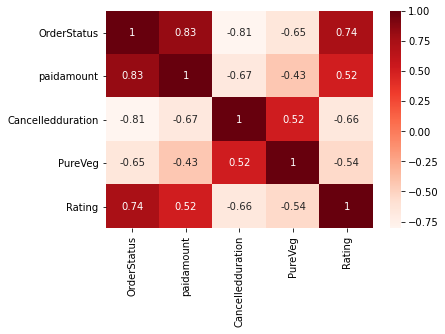

In [86]:
sns.heatmap(df[['OrderStatus','paidamount','Cancelledduration','PureVeg','Rating']].corr(), annot=True, cmap=plt.cm.Reds)

'OrderStatus','Paidamount'- Highly corelated, consider with Rating co relation, We can drop Paid amount.

<AxesSubplot:>

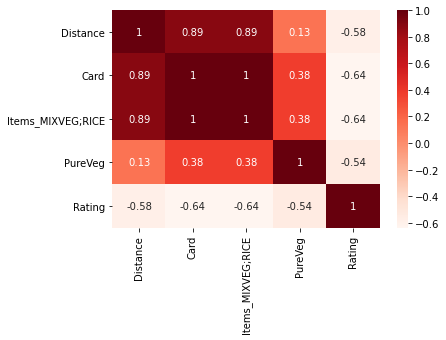

In [87]:
sns.heatmap(df[["Distance","Card",'Items_MIXVEG;RICE','PureVeg','Rating']].corr(),annot=True, cmap=plt.cm.Reds)

Distance, Card , Item_Mixedveg:Rice are highly corelated . Considering relationship with rating,, we can keep Item_Mixed;Rice

<AxesSubplot:>

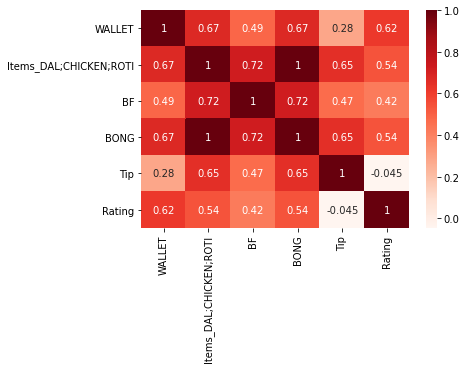

In [88]:
sns.heatmap(df[['WALLET','Items_DAL;CHICKEN;ROTI','BF','BONG','Tip','Rating']].corr(),annot=True, cmap=plt.cm.Reds)

BONG ,Items_DAL;CHICKEN;ROTI highly co related.
Bong, BF highly co related
Considering similar relation ship with Rating, We can drop Item.and Keep the BONG, Becasue Bong has highly corelation with all the attributes 

        After Considering all parameters we considered below attributes for model building.
    OrderStatus/Paidamount               0.744510
    PureVeg                   0.540850
    Cancelledduration         0.661262
    WALLET                   0.617189
    Items_MIXVEG;RICE/Distance/ Card/Item_Mixedveg:Rice          0.637818
    BONG/BONG/Items_DAL;CHICKEN;ROTI                       0.541404

# UNIVARIATE SELECTION _FILTER METHOD

In [89]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

In [90]:
X = df.drop(["Rating"],1)
y = df["Rating"]

In [91]:
def show_top_univariate_filters(data, score_func, top_k):
    X = data.iloc[:,0:20]  #independent columns
    y = data.iloc[:,-1]    #target column i.e price range

    if score_func == "chi2":
        func = chi2
    elif score_func == "f_classif":
        func = f_classif
    elif score_func == "mutual_info_classif":
        func = mutual_info_classif
    
    #apply SelectKBest class to extract top k best features
    bestfeatures = SelectKBest(score_func=func, k=top_k)
    fit = bestfeatures.fit(X,y)

    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)

    #concat two dataframes for better visualization 
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['Specs','Score']  #naming the dataframe columns
    print(featureScores.nlargest(top_k,'Score'))  #print 10 best features

In [145]:
show_top_univariate_filters(df, 'chi2', 10)

                     Specs       Score
8               paidamount  246.937886
9         Deliveryduration   80.396184
5                      Tip   47.948718
10       Cancelledduration   37.184515
4            Surge charges   15.560848
17   Items_CHICKEN;BIRYANI   11.656712
19          Items_DAL;ROTI   11.312217
18  Items_DAL;CHICKEN;ROTI    5.230769
14                    Card    4.358974
7                   Rating    3.985476


In [93]:
show_top_univariate_filters(df, 'f_classif', 5)

                     Specs      Score
5                      Tip  21.214286
19          Items_DAL;ROTI  18.687708
17   Items_CHICKEN;BIRYANI  18.328543
18  Items_DAL;CHICKEN;ROTI   7.285714
14                    Card   5.652709


# 2 Warpper Method
#### Backward Elimination

we feed all the possible features to the model at first. We check the performance of the model and then iteratively remove the worst performing features one by one till the overall performance of the model comes in acceptable range.Here we are using OLS model which stands for “Ordinary Least Squares”. This model is used for performing linear regression.

In [94]:
import statsmodels.api as sm

In [95]:
X = df.drop("Rating",1)   #Feature Matrix
y = df["Rating"]          #Target Variable


In [96]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()


In [146]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols) >0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['OrderStatus', 'Tip', 'Card', 'WALLET', 'Items_DAL;CHICKEN;ROTI', 'Items_MIXVEG;RICE', 'BONG', 'M_NO']


## RFE (Recursive Feature Elimination)
The Recursive Feature Elimination (RFE) method works by recursively removing attributes and building a model on those attributes that remain. It uses accuracy metric to rank the feature according to their importance.

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

In [147]:
#no of features
nof_list=np.arange(1,25)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(df.columns)-1):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 9
Score with 9 features: 0.717592


As seen from above code, the optimum number of features is 9. We now feed 9 as number of features to RFE and get the final set of features given by RFE method, as follows:

In [100]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 9)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['OrderStatus', 'PureVeg', 'NoP', 'Card', 'COD', 'WALLET',
       'Items_MIXVEG;RICE', 'BING', 'M_NO'],
      dtype='object')


# 3. Embedded Method

In [101]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [102]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.188152
Best score using built-in LassoCV: 0.698542


In [103]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 9 variables and eliminated the other 15 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

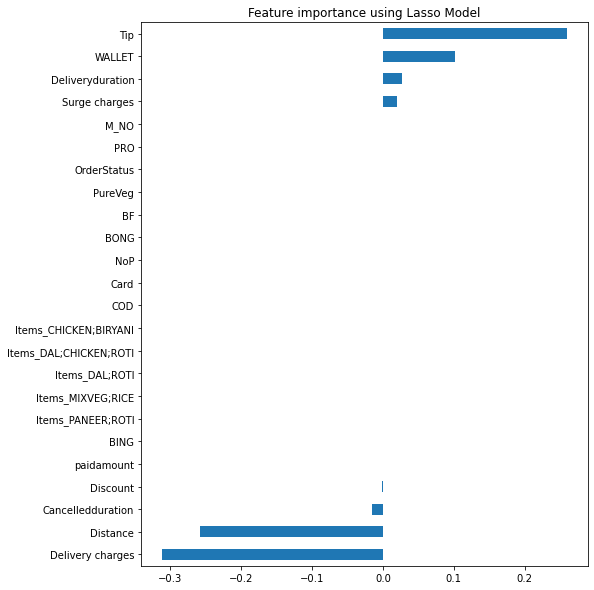

In [104]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

### From Above feature selection process, We can see significant features are 
OrderStatus/Paidamount (4)
Deliveryduration   (2)  
Tip(3)   
Deliveryduration(3)
Surge charges (2)   
WALLET  (4)   
Items_MIXVEG;RICE(3)  
BONG(2)      
pureveg(2)     

# Model Building 

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

In [106]:
# copy the data
#df_min_max_scaled = df.copy()
  
# apply normalization techniques
#for column in df_min_max_scaled.columns:
#    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    
  

In [107]:
#from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()
X_Grad = sx.fit_transform(df.drop(['Rating'],axis='columns').values)
y_Grad = sy.fit_transform(df['Rating'].values.reshape(df.shape[0],1))

In [108]:
# Data into train and Test
X_train, X_test, y_train, y_test = train_test_split(X_Grad,y_Grad,train_size = 0.8,random_state = 100 )

# ##Linear regression

In [109]:
reg = LinearRegression()
reg.fit(X_train,y_train)
print('coefficient obtained is',reg.coef_)
print('intercept obtained is',reg.intercept_)


coefficient obtained is [[-0.07133991  0.17037184 -0.02368946 -0.09097478  0.01818177 -0.12787412
  -0.11821578 -0.21252395  0.11905786  0.09647792  0.01097468 -0.07187059
   0.06089592 -0.16853234 -0.11111136  0.2796437   0.07755756  0.04065822
  -0.0018395  -0.16853234  0.05215606  0.1481493   0.04065822 -0.18880752]]
intercept obtained is [0.52562782]


In [110]:
num_data = X.shape[0]
#
ypred = reg.predict(X_train)
mse = mean_squared_error(y_train,ypred)
rmse = math.sqrt(mse)
rse = mse*num_data
rse /= num_data-2
rse = math.sqrt(rse)
r2_score = reg.score(X_train,y_train)
r2_score_test = reg.score(X_test,y_test)
#mse
#


In [111]:
print ( "RMSE:", rmse )
print ( "MSE:", mse )
print ( "RSE:", rse )


RMSE: 0.15045112249124493
MSE: 0.022635540258875587
RSE: 0.15321192382382287


In [112]:
print ( "R^2:", r2_score )
print ( "R^2:", r2_score_test ) # gives accuracy of mod

R^2: 0.8173043323378462
R^2: 0.6197758072593273


# ##MBGD

In [113]:
def mini_batch_gradient_descent(X, y_true, epochs , batch_size, learning_rate = 0.0001):
    
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (Weight, Lentgh and Height)
    w = np.ones(shape=(number_of_features)) 
    b = 0
   
    total_samples = X.shape[0] # number of rows in X
    
    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples
        
    cost_list = []
    epoch_list = []
    
    num_batches = int(total_samples/batch_size)
    
    for i in range(epochs):    
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]
        
        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w, Xj.T) + b
            
            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
            
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
                
            cost = np.mean(np.square(yj-y_predicted)) # MSE (Mean Squared Error)
#        print("w{},i{},b{},cost{}".format(w,i,b,cost))
#        if i%10==0:
        cost_list.append(cost)
        epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list



In [114]:
w, b, cost, cost_list_mbg, epoch_list_mbg = mini_batch_gradient_descent(X_train,y_train.reshape(y_train.shape[0],),epochs = 50,
    batch_size = 5,learning_rate = 0.0005)
w, b, cost

(array([-0.00931766,  0.06430441,  0.65857515,  0.24411977,  0.40969343,
         0.33266441,  0.16355625,  0.49681775,  0.39207568,  0.65324018,
         0.79900994,  0.40059833,  0.28020864,  0.63026176,  0.38946337,
         0.46009179,  0.61385801,  0.70240265,  0.78525074,  0.63026176,
         0.74804375,  0.2530989 ,  0.70240265,  0.52431537]),
 -1.520183084685645,
 1.8167149238839677)

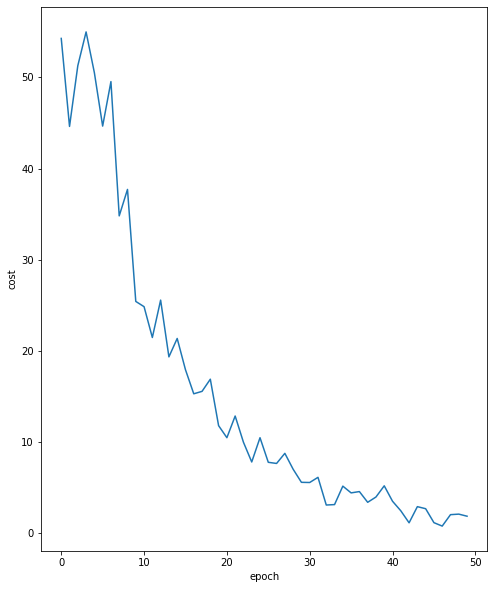

In [115]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_mbg,cost_list_mbg)

In [116]:
y_predicted_mbg = np.dot(w, X_train.T) + b

In [117]:
mse = mean_squared_error(y_train,y_predicted_mbg)
rmse = math.sqrt(mse)
rse = mse*X_train.shape[0]
rse /= X_train.shape[0]-2
rse = math.sqrt(rse)

#
print ( "RMSE:", rmse )
print ( "MSE:", mse )
print ( "RSE:", rse )

RMSE: 1.1867465000341852
MSE: 1.4083672553433884
RSE: 1.2146737680302033


In [118]:
r2_score_mbg = reg.score(X_train,y_train)
r2_score_mbg_test = reg.score(X_test,y_test)

#mse

print ( "R^2:", r2_score_mbg )
print ( "R^2:", r2_score_mbg_test )

R^2: 0.8173043323378462
R^2: 0.6197758072593273


## Model building with Features which are selected during Feature Selection process

In [119]:
Feature_Set =["OrderStatus","Deliveryduration", "Surge charges","WALLET","Items_MIXVEG;RICE","PureVeg","BONG","Rating"]
df_select_Feature=df[Feature_Set] 
  

In [120]:
X_Feat = sx.fit_transform(df_select_Feature.drop(['Rating'],axis='columns').values)
y_Feat = sy.fit_transform(df_select_Feature['Rating'].values.reshape(df.shape[0],1))

In [121]:
# Data into train and Test
X_train, X_test, y_train, y_test = train_test_split(X_Feat,y_Feat,train_size = 0.7,random_state = 42 )

In [122]:
reg = LinearRegression()
reg.fit(X_train,y_train)
print('coefficient obtained is',reg.coef_)
print('intercept obtained is',reg.intercept_)


coefficient obtained is [[ 0.4237187   0.01403863  0.23472081  0.21931835 -0.28738216  0.20319243
   0.22636957]]
intercept obtained is [-0.06670222]


In [123]:
r2_score = reg.score(X_train,y_train)
r2_score_test = reg.score(X_test,y_test)
print ( "R^2:", r2_score )
print ( "R^2:", r2_score_test ) # gives accuracy of mod

R^2: 0.7821110142960856
R^2: 0.664028962693054


In [124]:
w, b, cost, cost_list_mbg, epoch_list_mbg = mini_batch_gradient_descent(X_train,y_train.reshape(y_train.shape[0],),epochs = 50,
    batch_size = 5,learning_rate = 0.0005)
w, b, cost

(array([0.6051307 , 0.76114103, 0.74880174, 0.73063684, 0.85989862,
        0.67424202, 0.86417369]),
 -0.588227056470629,
 0.9978334162339763)

In [125]:
r2_score = reg.score(X_train,y_train)
r2_score_test = reg.score(X_test,y_test)
print ( "R^2:", r2_score )
print ( "R^2:", r2_score_test )


R^2: 0.7821110142960856
R^2: 0.664028962693054


We have seen slight difference in feature selection build model and other developed model. 
This is provig that There are redunduncy of features in 1st model.it can lead to overfitting.